<h3>Reading csv file</h3>

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('C:/Users/Lenovo/Downloads/phones_data.csv')
df.set_index('index',inplace=True)

<h3>1.Cleaning data:</h3>

<h3>Dropping duplicates</h3>

In [173]:
df.drop_duplicates(inplace=True)

<h3>Removing rows where each column is null</h3>

In [175]:
df.dropna(axis='columns',how='all',inplace=True)

<h3>Checking null values of each column</h3>

In [176]:
df.isna().sum()

brand_name          0
model_name          0
os                197
popularity          0
best_price          0
lowest_price      260
highest_price     260
sellers_amount      0
screen_size         2
memory_size       112
battery_size       10
release_date        0
dtype: int64

<h3>Replacing null values of 'os' column with the string 'Unknown'</h3>

In [177]:
df['os'].fillna('Unknown',inplace=True)

<h3>Replacing null values of 'lowest_price' column with the lowest value of that column:</h3>

In [179]:
min_lowest_price=df['lowest_price'].min()
df['lowest_price'].fillna(min_lowest_price,inplace=True)

<h3>Replacing null values of 'highest_price' column with the highest value of that column</h3>

In [180]:
max_highest_price=df['highest_price'].max()
df['highest_price'].fillna(max_highest_price,inplace=True)

<h3>Replacing null values of 'screen_size' column with the average value of that column</h3>

In [181]:
avg_screen_size=df['screen_size'].mean()
df['screen_size'].fillna(avg_screen_size,inplace=True)

<h3>Replacing null values of 'memory_size' with the average value of that column</h3>

In [139]:
avg_memory_size=df['memory_size'].mean()
df['memory_size'].fillna(avg_memory_size,inplace=True)

<h3>Replacing null values of 'battery_size' wih the average value of that column</h3>

In [182]:
avg_battery_size=df['battery_size'].mean()
df['battery_size'].fillna(avg_battery_size,inplace=True)

<h3>Converting release_date from 'string' to 'date' and replacing the date string with proper datetime</h3>

In [183]:
import datetime
from datetime import datetime
def date_conversion(date_str):
    date=1
    date_object = datetime.strptime(date_str + "-01", "%b-%y-%d")
    return date_object
   
df['release_date'] = df['release_date'].apply(date_conversion)

<h3>Analysing given data:</h3>

In [184]:
df[['popularity','best_price','lowest_price','highest_price','sellers_amount','screen_size','memory_size','battery_size']].describe()

,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size
count,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1112.000000,1224.000000
mean,612.500000,7941.206699,6119.053922,22653.062092,16.743464,5.394378,95.700059,3608.201812
std,353.482673,8891.836260,8195.888909,26636.269737,20.597006,1.475783,111.922576,1661.434379
min,1.000000,214.000000,198.000000,229.000000,1.000000,1.400000,0.003200,460.000000
25%,306.750000,2599.750000,427.000000,3499.000000,2.000000,5.187500,32.000000,2900.000000
50%,612.500000,4728.000000,3372.500000,7511.500000,8.000000,6.000000,64.000000,3608.201812
75%,918.250000,9323.000000,7005.500000,35553.500000,26.000000,6.400000,128.000000,4385.000000
max,1224.000000,56082.000000,49999.000000,69999.000000,125.000000,8.100000,1000.000000,18800.000000


<h3>Costliest and cheapest phones in every 'os' based on avg_price</h3>

In [185]:
x=df.groupby('os')
def get_cheapest_and_costliest(group):
    c=group.loc[group['best_price'].idxmin()]
    h=group.loc[group['best_price'].idxmax()]
    return pd.Series({'cheapest_phone':c['model_name'],'cheapest_phone_price':c['best_price'],'costiest_phone':h['model_name'],'costiest_phone_cost':h['best_price']})
result_df = x.apply(get_cheapest_and_costliest)
result_df.sort_values('os')

,cheapest_phone,cheapest_phone_price,costiest_phone,costiest_phone_cost
os,,,,
Android,40 Neon,840,Mate Xs 8/512GB Interstellar blue (51095CSQ),56082
EMUI,P40 Pro+ 8/512GB Black Ceramic,31656,P40 Pro+ 8/512GB Black Ceramic,31656
KAIOS,X-style S3500 sKai Black,1036,X-style S3500 sKai Black,1036
OxygenOS,3T 64GB (Gunmetal),5856,3T 128GB (Gunmetal),6991
Unknown,A144 Black/Red,214,M6s 3/64GB Gold,4200
WindowsPhone,Lumia 925 (Black),2600,Lumia 925 (Black),2600
iOS,iPhone 5C 8GB (White),2445,iPhone 12 Pro Max 512GB Dual Sim Pacific Blue ...,49242


<h3>Most popular phone and least popular phone and their os,features like battery</h3>

In [186]:
most_popular=df.loc[df['popularity'].idxmax()]
least_popular=df.loc[df['popularity'].idxmin()]
a=(most_popular[['model_name','os','screen_size','memory_size','battery_size','best_price']],least_popular[['model_name','os','screen_size','memory_size','battery_size','best_price']])
a

(model_name      iPhone 12 Pro 128GB Pacific Blue (MGMN3/MGLR3)
 os                                                         iOS
 screen_size                                                6.1
 memory_size                                              128.0
 battery_size                                            2815.0
 best_price                                               33992
 Name: 1147, dtype: object,
 model_name      S1-07 Gold
 os                 Unknown
 screen_size            1.8
 memory_size            NaN
 battery_size        1000.0
 best_price             299
 Name: 859, dtype: object)

<h5>From above, we can see that the least popular mobile is an unkown 'os' but the most popular mobile is iOS 'os'. The other featurs like 'screen_size', 'memory_size', 'battery_size' are more in most popular mobile only. But the price of most popular mobile is less that the least popular mobile. This is the reason for it's popularity.</h5>

<h3>Number of mobiles in each 'os'</h3>

In [187]:
os_groups=df.groupby('os')
plt.style.use('fivethirtyeight')
os_groups['os'].value_counts().sort_values(ascending=False)

os
Android         915
Unknown         197
iOS             103
OxygenOS          3
WindowsPhone      3
EMUI              2
KAIOS             1
Name: count, dtype: int64

<h3>plotting 'os' count versus 'os' name in descending order as above result</h3>

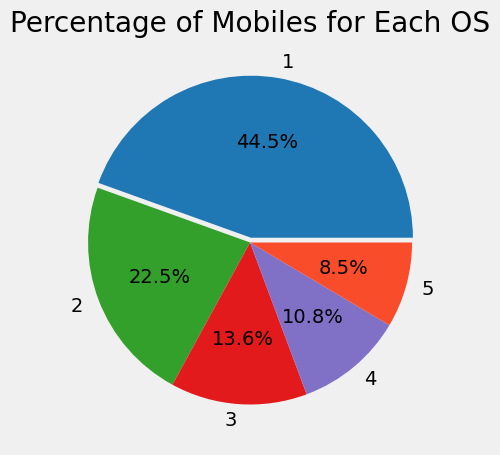

In [256]:
os_counts = df['sellers_amount'].value_counts().sort_values(ascending=False).head()
explode=[0.03,0,0,0,0]
plt.figure(figsize=(8, 5))
plt.pie(os_counts,explode=explode, labels=os_counts.index, autopct='%1.1f%%', startangle=0, colors=['#1f78b4', '#33a02c', '#e31a1c','#8070C6','#F84C2A'])
plt.title('Percentage of Mobiles for Each OS')
plt.show()

<h5>From the above plot, we can see that most of the mobiles are of 'Android' 'os' and least of the mobiles are 'KAIOS' 'os'.</h5>

<h3>Number of mobiles in each 'brand_name'</h3>

In [189]:
os_groups=df.groupby('brand_name')
os_groups['brand_name'].value_counts().sort_values(ascending=False)

brand_name
Samsung         168
Xiaomi          111
Apple           102
Motorola         62
Sigma mobile     52
               ... 
Microsoft         1
Land              1
myPhone           1
LEAGOO            1
MAFAM             1
Name: count, Length: 64, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17448\1585528218.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='brand_name',width=0.5, data=df, palette='pastel', order=df['brand_name'].value_counts(ascending=False).head().index)


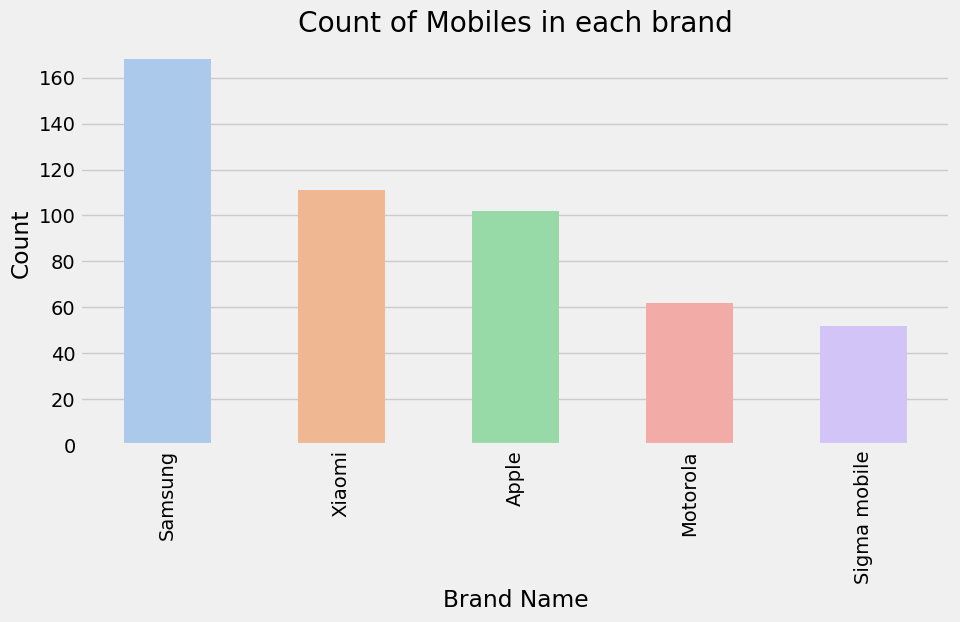

In [257]:
plt.figure(figsize=(10, 5))
sns.countplot(x='brand_name',width=0.5, data=df, palette='pastel', order=df['brand_name'].value_counts(ascending=False).head().index)
plt.title('Count of Mobiles in each brand')
plt.xlabel('Brand Name')
plt.ylabel('Count')
plt.xticks(rotation='vertical')
plt.show()

<h3>5 phones with highest number of sellers amount</h3>

In [262]:
mobiles_with_highest_sellers=df.nlargest(5,'sellers_amount')
mobile=mobiles_with_highest_sellers['model_name']
sellers=mobiles_with_highest_sellers['sellers_amount']

<h3>Plotting top 5 mobiles with highest sellers amount</h3>

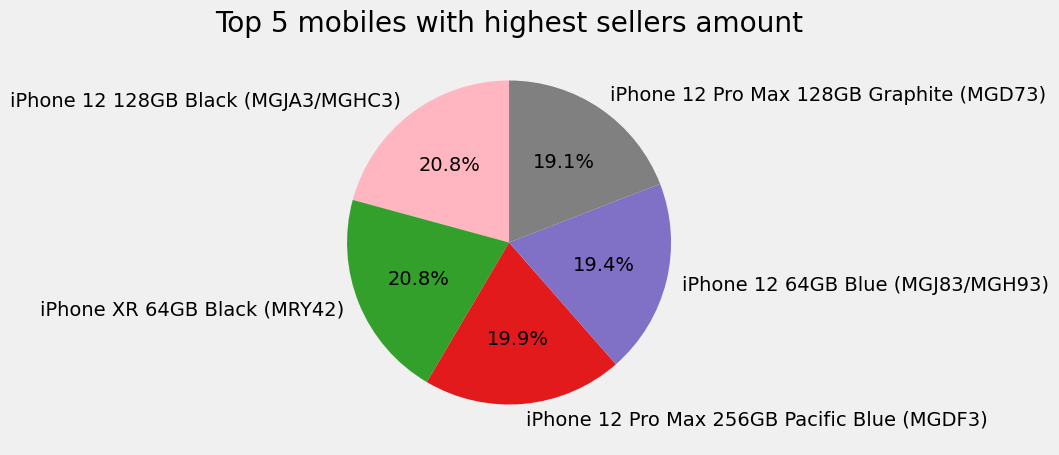

In [265]:
plt.figure(figsize=(6, 5))
plt.pie(sellers, labels=mobile, autopct='%1.1f%%', startangle=90, colors=['lightpink', '#33a02c', '#e31a1c','#8070C6','grey'])
plt.title('Top 5 mobiles with highest sellers amount')
plt.show()

<h3>Top 5 Brands having highest number of mobiles having screen size greater than or equal to average screen size of all mobiles and their screen size</h3>

In [194]:
average_screen_size=df['screen_size'].mean()
filt=df['screen_size']>=average_screen_size
mobiles_with_screen_size_greater_that_equal_to_avg_screen_size=df.loc[filt]
brand_groups=mobiles_with_screen_size_greater_that_equal_to_avg_screen_size.groupby('brand_name')
brand_groups['brand_name'].value_counts().sort_values(ascending=False)

brand_name
Samsung         160
Xiaomi          102
Apple            71
Motorola         52
HUAWEI           46
DOOGEE           42
Blackview        39
realme           30
Honor            27
Meizu            26
Ulefone          24
LG               23
ZTE              22
OPPO             21
Oukitel          20
OnePlus          18
Tecno            18
vivo             17
Nokia            16
Google           14
Sony             12
ASUS             10
Sigma mobile      9
Lenovo            8
Cubot             7
AGM               6
ALCATEL           6
Vernee            5
Archos            5
UMIDIGI           5
Elephone          3
CAT               3
Bluboo            3
HTC               3
Smartex           2
2E                2
Philips           2
Coolpad           2
Bravis            2
Sharp             1
S-TELL            1
NUU               1
LEAGOO            1
Vodafone          1
General           1
Microsoft         1
Name: count, dtype: int64

<h3>Top 7 brand names which has highest number of mobiles with black color,battery size greater than or equal to average battery size and price less than or equal to average of avg_price and their counts</h3>

In [204]:
filt=(df['battery_size']>=df['battery_size'].mean()) & (df['best_price']<=df['best_price'].mean()) & (df['model_name'].str.contains('Black'))
df_matched_with_filt=df.loc[filt]
black_phones_groups=df_matched_with_filt.groupby('brand_name')
final_count=black_phones_groups['brand_name'].value_counts().sort_values(ascending=False).head(7)
final_count

brand_name
Blackview       25
DOOGEE          23
Xiaomi          18
Sigma mobile    17
Samsung         16
Oukitel         16
Ulefone          8
Name: count, dtype: int64

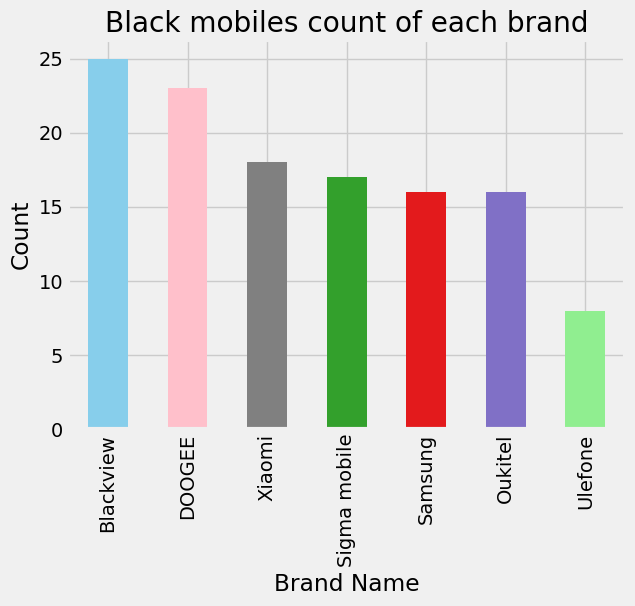

In [266]:
final_count.plot(kind='bar', color=['skyblue','pink','grey','#33a02c', '#e31a1c','#8070C6','lightgreen'])
plt.title('Black mobiles count of each brand')
plt.xlabel('Brand Name')
plt.ylabel('Count')
plt.show()

<h3>10 most recent phones</h3>

In [267]:
df[['model_name','release_date']].sort_values(by='release_date',ascending=False).head(10)

,model_name,release_date
index,,
103,7 6/64GB Mist Blue,2021-02-01
383,Galaxy A02s 3/32GB Blue (SM-A025FZBE),2021-01-01
189,Armor 10 5G 8/128GB Black,2021-01-01
513,Galaxy S21 8/128GB Phantom Grey (SM-G991BZADSEK),2021-01-01
514,Galaxy S21 8/256GB Phantom Grey (SM-G991BZAGSEK),2021-01-01
515,Galaxy S21 Ultra 12/128GB Phantom Black (SM-G9...,2021-01-01
517,Galaxy S21 Ultra 16/512GB Phantom Black (SM-G9...,2021-01-01
518,Galaxy S21+ 8/128GB Phantom Black (SM-G996BZKD...,2021-01-01
519,Galaxy S21+ 8/256GB Phantom Black (SM-G996BZKG...,2021-01-01


<h3>Popularity versus lowest_price, highest_price and best_price.Here I'm taking top 7 popular phones</h3>

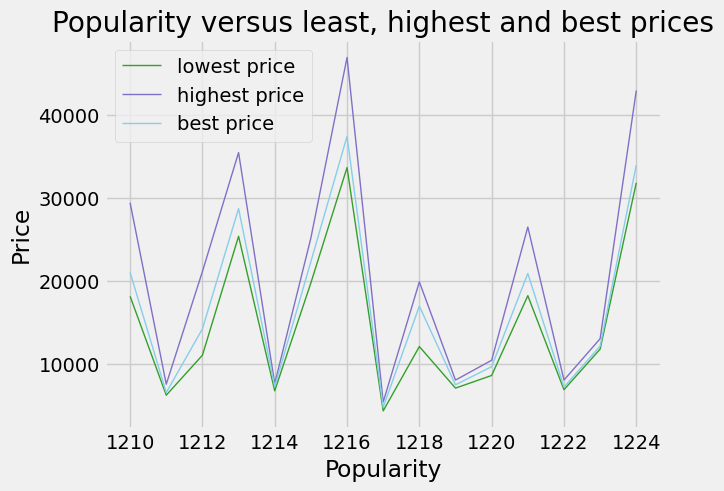

In [272]:
top_7_popular_phones=df.sort_values(by='popularity',ascending=False).head(15)
x=top_7_popular_phones['popularity']
y=top_7_popular_phones['lowest_price']
y1=top_7_popular_phones['highest_price']
y2=top_7_popular_phones['best_price']
plt.plot(x, y, label='lowest price',linewidth=1,color='#33a02c')
plt.plot(x, y1, label='highest price',linewidth=1,color='#8070C6')
plt.plot(x, y2, label='best price',linewidth=1,color='skyblue')
plt.xlabel('Popularity')
plt.ylabel('Price')
plt.title('Popularity versus least, highest and best prices')
plt.legend()
plt.show()

<h5>Here the prices and popularity are independent of each other. Some are very costly some are very cheap</h5>

<h3>Popularity versus sellers amount</h3>

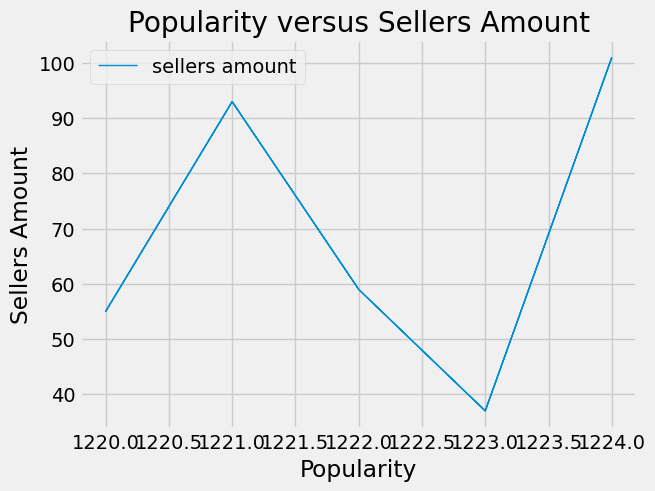

In [273]:
top_5_popular_phones=df.sort_values(by='popularity',ascending=False).head(5)
bottom_5_popular_phones=df.sort_values(by='popularity',ascending=True).tail(5)
sample_popular_phones=pd.concat([top_5_popular_phones,bottom_5_popular_phones])
x=sample_popular_phones['popularity']
y=sample_popular_phones['sellers_amount']
plt.plot(x, y, label='sellers amount',linewidth=1)
plt.xlabel('Popularity')
plt.ylabel('Sellers Amount')
plt.title('Popularity versus Sellers Amount')
plt.legend()
plt.show()

<h5>As we can see above, in some cases more popular are of less prices and vice versa. In some cases, more popular are of more prices and less popular are of less prices</h5>


<h3>Top 4 Months in which most of the number of phones are released</h3>

In [274]:
release_month=df['release_date'].dt.month
final_counts=release_month.value_counts()
more_phones=final_counts.head(4)
less_phones=final_counts.tail(4)

<h3>Plotting release month versus number of phones</h3>

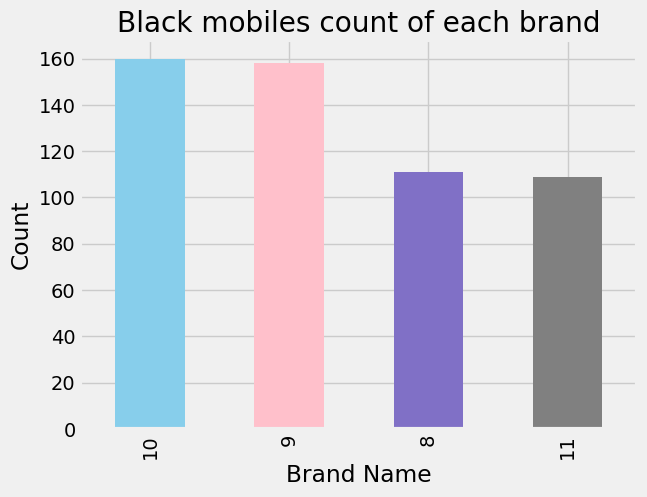

In [278]:
more_phones.plot(kind='bar', color=['skyblue', 'pink','#8070C6','grey'])
plt.title('Black mobiles count of each brand')
plt.xlabel('Brand Name')
plt.ylabel('Count')
plt.show()

<h3>Here, we can see that most of the mobiles are releasing in october and september months</h3>

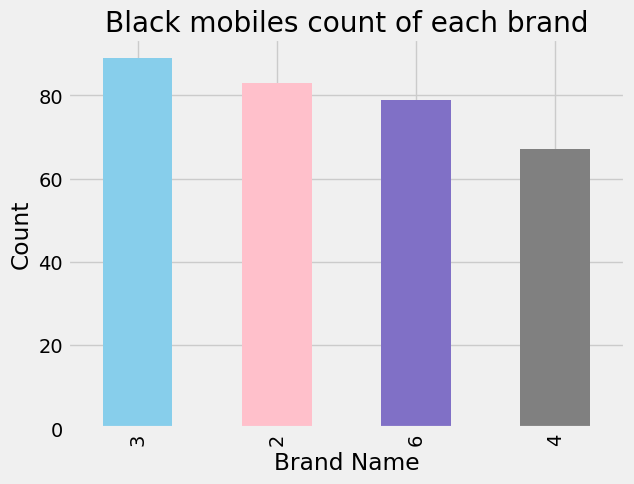

In [280]:
less_phones.plot(kind='bar', color=['skyblue', 'pink','#8070C6','grey'])
plt.title('Black mobiles count of each brand')
plt.xlabel('Brand Name')
plt.ylabel('Count')
plt.show()

<h5>We can see that in april,june there are less number of phones are releasing</h5>

<h3>Average price of each os</h3>

In [281]:
df.groupby(['os'])['best_price'].mean()

os
Android          8009.955191
EMUI            31656.000000
KAIOS            1036.000000
OxygenOS         6612.666667
Unknown           758.233503
WindowsPhone     2600.000000
iOS             20869.611650
Name: best_price, dtype: float64

<h3>Plotting average prices of each os</h3>

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17448\395897492.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='os', y='best_price', data=avg_prices, palette='viridis')


<Axes: xlabel='os', ylabel='best_price'>

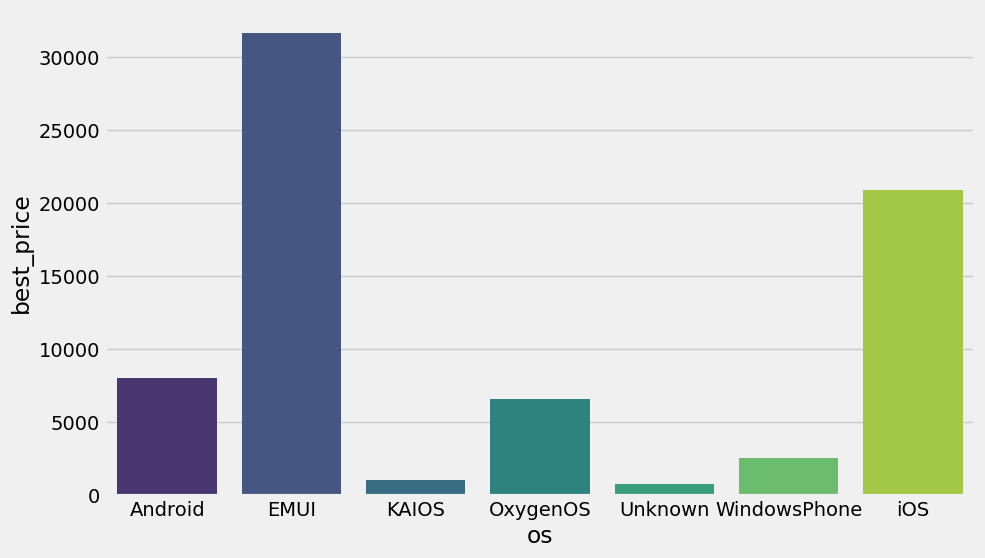

In [282]:
avg_prices = df.groupby('os')['best_price'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='os', y='best_price', data=avg_prices, palette='viridis')

<h3>maximum memory size in each brand</h3>

In [283]:
df.groupby(['brand_name'])['memory_size'].max()

brand_name
2E           16.000
AGM         128.000
ALCATEL     128.000
ASUS        512.000
Apple       512.000
             ...   
ZTE         128.000
iOutdoor      0.032
myPhone      16.000
realme      256.000
vivo        256.000
Name: memory_size, Length: 64, dtype: float64

<h3>Most popular Android Mobile and it's details</h3>

In [284]:
filt=df['os']=='Android'
hight_popularity=df[filt]['popularity'].idxmax()
df.loc[hight_popularity]

brand_name                             Google
model_name        Pixel 4a 6/128GB Just Black
os                                    Android
popularity                               1223
best_price                              12106
lowest_price                          11740.0
highest_price                         12999.0
sellers_amount                             37
screen_size                              5.81
memory_size                             128.0
battery_size                           3140.0
release_date              2020-08-01 00:00:00
Name: 734, dtype: object

<h3>Cheapest iPhone with battery size greater than or equal 3000 </h3>

In [285]:
filt=(df['battery_size']>=3000)& (df['os']=='iOS')
cheapest_phone=df[filt]['best_price'].idxmin()
df.loc[cheapest_phone]

brand_name                                   Apple
model_name        iPhone 8 64GB Space Gray (MQ6G2)
os                                             iOS
popularity                                    1162
best_price                                   11745
lowest_price                                7343.0
highest_price                              15060.0
sellers_amount                                  48
screen_size                                    4.7
memory_size                                   64.0
battery_size                           3608.201812
release_date                   2017-09-01 00:00:00
Name: 1190, dtype: object

<h3>Number of mobiles available in different price ranges</h3>

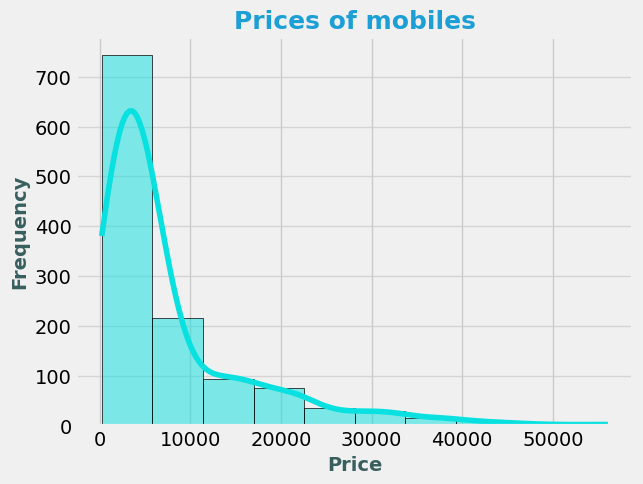

In [286]:
ax = sns.histplot(df['best_price'], bins=10, kde=True, color='#09e0e0', edgecolor='black')
plt.title('Prices of mobiles', fontsize=18, fontweight='bold', color='#1c9ed6')
plt.xlabel('Price', fontsize=14, fontweight='bold', color='#385e5e')
plt.ylabel('Frequency', fontsize=14, fontweight='bold', color='#385e5e')
plt.grid(axis='y', alpha=0.75)
plt.show()

<h3>Year vs Number of Mobiles</h3>

In [301]:
release_month=df['release_date'].dt.year.sort_values(ascending=False)
mobiles_count=release_month.value_counts()
mobiles_count

release_date
2020    476
2019    331
2018    201
2017     94
2016     47
2021     33
2015     25
2014     10
2013      7
Name: count, dtype: int64

<h4>Plotting year vs number of mobiles</h4>

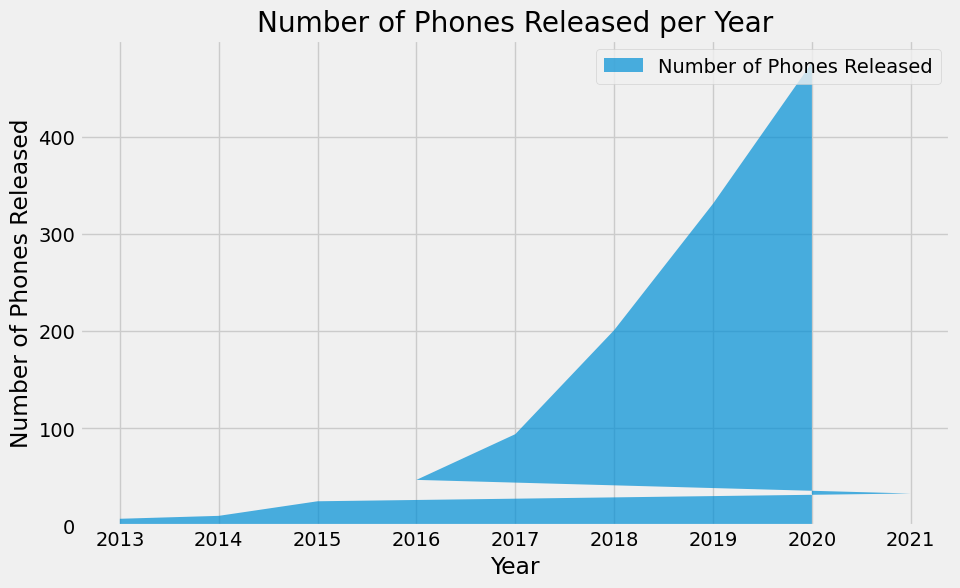

In [302]:
plt.figure(figsize=(10, 6))
plt.stackplot(mobiles_count.index, mobiles_count.values, labels=['Number of Phones Released'], alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Number of Phones Released')
plt.title('Number of Phones Released per Year')
plt.legend()

<h3>1.More number of Androids are released till now.Most of the mobiles released in 2020.</h3>
<h3>2.Here mobiles with high popularity has better features and less price.</h3>
<h3>3.There are more mobiles in Samsung brand.</h3>
<h3>4.iOS os and Apple Brand has more number sellers.</h3>
<h3>5.The brand with better features is samsung.</h3>
<h3>6.Most of the top recent phones are of model Galaxy.</h3>
<h3>7.There is connection between populary vs price and sellers amount.</h3>
<h3>8.Highest number of mobiles are releasing in September and October. Less number of mobiles are releasing in April and June.</h3>
<h3>9.EMUI os has highest average price.</h3>
<h3>10.Price range of most of the mobiles is 0-10,000</h3>